In [1]:
## KMEANS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.utils import shuffle
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
dataframe = pd.read_csv(r"data/avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataframe = dataframe[["AveragePrice", "region", "Total Volume"]]
dataframe.head()

,AveragePrice,region,Total Volume
0,1.33,Albany,64236.62
1,1.35,Albany,54876.98
2,0.93,Albany,118220.22
3,1.08,Albany,78992.15
4,1.28,Albany,51039.60


In [6]:
dataframe = dataframe.set_index("region")
dataframe.head()

,AveragePrice,Total Volume
region,,
Albany,1.33,64236.62
Albany,1.35,54876.98
Albany,0.93,118220.22
Albany,1.08,78992.15
Albany,1.28,51039.60


In [7]:
cities = dataframe.loc[["NewYork", "PhoenixTucson","SanFrancisco", "Houston","LosAngeles"]]

In [8]:
cities = cities.reset_index()
print(cities.groupby('region').size())
cities.head()
cities 

region
Houston          338
LosAngeles       338
NewYork          338
PhoenixTucson    338
SanFrancisco     338
dtype: int64


,region,AveragePrice,Total Volume
0,NewYork,1.17,1129876.05
1,NewYork,1.23,1139347.98
2,NewYork,1.12,1254805.29
3,NewYork,1.20,1068971.54
4,NewYork,1.16,999169.64
...,...,...,...
1685,LosAngeles,1.60,100274.88
1686,LosAngeles,1.73,97026.15
1687,LosAngeles,1.75,94441.50
1688,LosAngeles,1.68,106624.63


In [9]:
df_shuffled=sklearn.utils.shuffle(cities)
print(df_shuffled)

             region  AveragePrice  Total Volume
1033        Houston          0.92     968899.09
968    SanFrancisco          2.93      21524.58
390   PhoenixTucson          0.64    1108953.48
81          NewYork          1.47    1447580.25
595   PhoenixTucson          1.53      18395.17
...             ...           ...           ...
1054        Houston          0.80    1036663.77
952    SanFrancisco          2.27      15142.03
1101        Houston          0.67    1393042.56
1090        Houston          0.89    1101543.61
281         NewYork          2.05      71500.85

[1690 rows x 3 columns]


In [12]:
y = cities.region # define the target variable (dependent variable) as y
X, X_test, y, y_test = train_test_split(cities, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1352, 3) (1352,)
(338, 3) (338,)


In [8]:
X = np.array(cities[["AveragePrice","Total Volume"]])
y = np.array(cities['region'])
X.shape

(1690, 2)

In [13]:
cities['region'] = cities['region'].replace(['Houston'],1)
cities['region'] = cities['region'].replace(['LosAngeles'],2)
cities['region'] = cities['region'].replace(['NewYork'],3)
cities['region'] = cities['region'].replace(['PhoenixTucson'],4)
cities['region'] = cities['region'].replace(['SanFrancisco'],5)

In [14]:
cities["region"] = pd.to_numeric(cities["region"])
print(cities.groupby('region').size())

region
1    338
2    338
3    338
4    338
5    338
dtype: int64


In [15]:
print(cities['region'])

0       3
1       3
2       3
3       3
4       3
       ..
1685    2
1686    2
1687    2
1688    2
1689    2
Name: region, Length: 1690, dtype: int64


In [16]:
X = np.array(cities[["AveragePrice","Total Volume"]])
y = np.array(cities['region'])

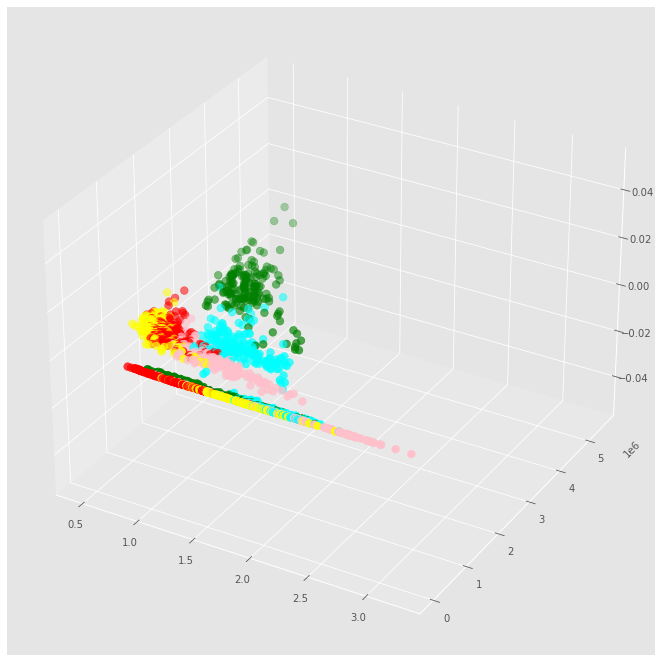

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','cyan','yellow', 'pink', 'blue', 'cyan']
asignar=[]
for row in y:
#     print(row, type(row))
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)

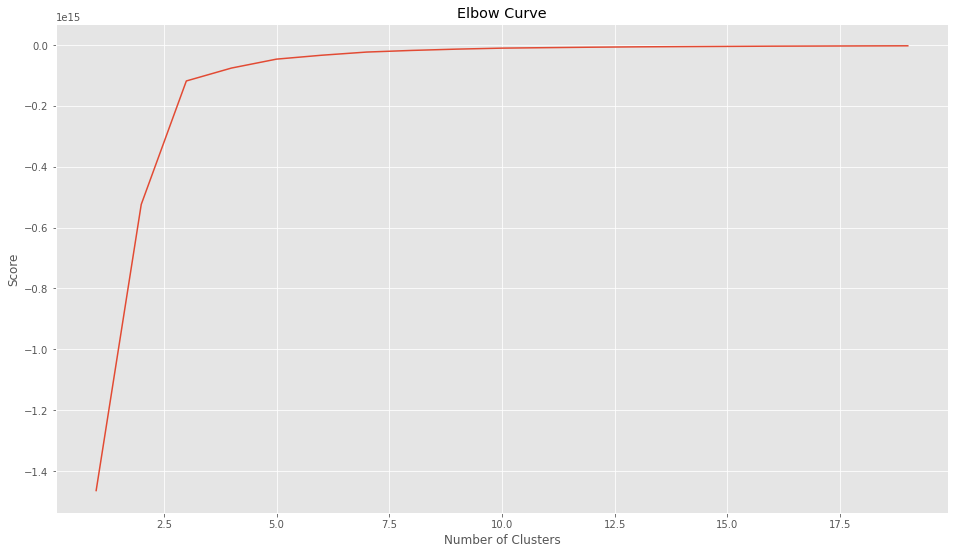

In [18]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.74285207e+00 3.79739902e+04]
 [1.17415978e+00 8.75834684e+05]
 [1.00018018e+00 2.62229524e+06]
 [8.27903226e-01 3.51577707e+06]
 [1.00818770e+00 1.37282552e+06]]


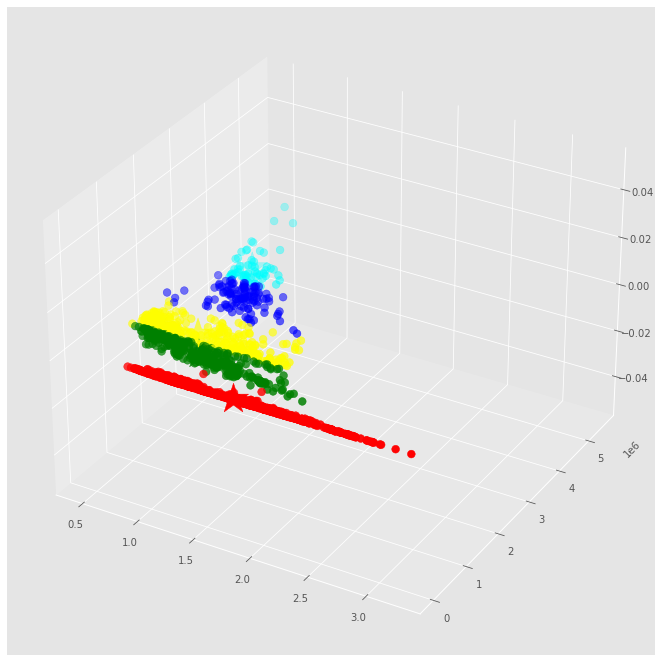

In [20]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

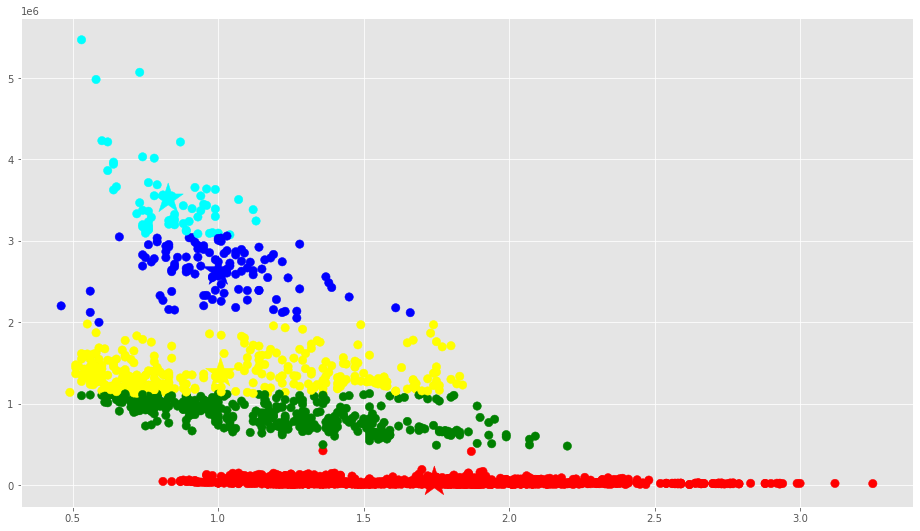

In [21]:
# Getting the values and plotting it
f1 = cities['AveragePrice'].values
f2 = cities['Total Volume'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [22]:
copy =  pd.DataFrame()
# copy['usuario']=cities['usuario'].values
copy['region']= cities['region'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,845
1,green,363
2,blue,111
3,cyan,62
4,yellow,309


In [23]:
group_referrer_index = copy['label'] == 4
group_referrals = copy[group_referrer_index]
print(group_referrals)
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['region']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('region').size()
diversidadGrupo

      region  label
0          3      4
1          3      4
2          3      4
6          3      4
7          3      4
...      ...    ...
1468       2      4
1469       2      4
1470       2      4
1471       2      4
1472       2      4

[309 rows x 2 columns]


,region,cantidad
0,0,NaN
1,1,82.0
2,2,10.0
3,3,123.0
4,4,85.0
5,5,9.0


In [24]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1569,  787, 1359, 1482,   79])

In [77]:
X_new = np.array([[1.75,94441.50]]) #davidguetta
# 0	NewYork	1.17	1129876.05

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


In [74]:
cities.tail()

,region,AveragePrice,Total Volume
1685,2,1.60,100274.88
1686,2,1.73,97026.15
1687,2,1.75,94441.50
1688,2,1.68,106624.63
1689,2,1.80,87517.23
